<a href="https://colab.research.google.com/github/pratikshiralkar/EDA-Capstone-Project/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# World recognised service - Airbnb
Airbnb is world recognised American online platform for people with respect to rental homes.It is well known for their services since 2008.NYC is the most famous city in the United States, and globally recognized tourism and business places too.Airbnb became important service that is used by the entire world,offering over 7 million accommodations and 50,000 handcrafted activities, all powered by local hosts. 
Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed and useful for security,decisions realted to  business, understanding of customers’ and providers’ behavior on the platform ! It also helps in implementing innovative additional services, guiding marketing initiatives too.


# Importing Libraries

In [78]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the data

In [80]:
nyc_df = pd.read_csv('/content/drive/MyDrive/csv file/Airbnb NYC 2019.csv')

# Basic information about the dataset 

In [81]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [82]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**This dataset has around 48,895 observations with 16 columns and it is a mix between categorical and numeric values**.

In [83]:
nyc_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**describre() used to view some basic statistical details like percentile, mean, std.deviation etc**

# Checking Missing Values
**After inspecting the dataset , find that there are many null values and need to check the number of null values in each column.**

In [85]:
nyc_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing data is one of the most common problem in data cleaning. There is no standard method of replacing the missing values and the method of imputating them highly depends on the type of problem and the data we are dealing with.**

**There are 16 null values in the "name" field, 21 null values in the "host_name" and 10052 null values in both the "last_review" and the "reviews_per_month" columns.
 Need to remove this null values from the dataset when analyzing the data.**

**Replacing null values in the column reviews_per_month with 0 in the dataset**

In [86]:
nyc_df.fillna({'reviews_per_month':0}, inplace=True)
nyc_df.reviews_per_month.isnull().sum()

0

**Replacing null values in the column name with the character @ and hostname with character $ in the dataset. Both name and hostname are not the main aspects in our analysis, that's why replaced**

In [87]:
nyc_df['name'].fillna("@",inplace=True)
nyc_df['host_name'].fillna("$",inplace=True)


**Dropping the column last review having 10,052 data points contains null values.**

In [88]:
nyc_df.drop('last_review',axis=1,inplace=True)


**All the null values has removed from the dataset.**

In [89]:
nyc_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
#Columns remained in the dataset after removing unwanted column.
nyc_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
#Number of unique values respective with columns in the dataset
nyc_df.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
#types of rooms
nyc_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**There are only 3 types of rooms that are listed on Airbnb**

In [12]:
#Number of neighbourhood_group 
nyc_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
#neighbourhood_group value counts 
nyc_df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**From the above data values it clearly shows that Manhatten and Brooklyn having more room counts than others**

**Exploring the data** 

 Most popular neighborhood groups among the listings


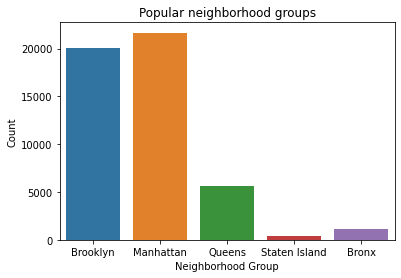

In [14]:
#popular neighborhood groups
ax = sns.countplot(x="neighbourhood_group", data=nyc_df)
plt.title('Popular neighborhood groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()

**Most popular neighborhoods among the listings**

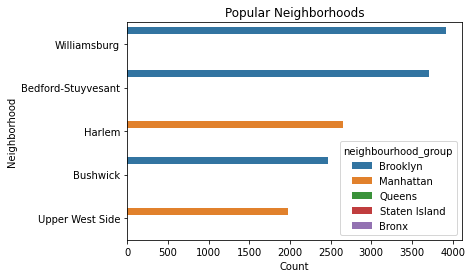

In [15]:
plt.ax = sns.countplot(y="neighbourhood", hue="neighbourhood_group", data=nyc_df,
              order=nyc_df['neighbourhood'].value_counts().iloc[:5].index)
plt.title('Popular Neighborhoods')
plt.ylabel('Neighborhood')
plt.xlabel('Count')
plt.show()

**Most occupied room types among the listings**

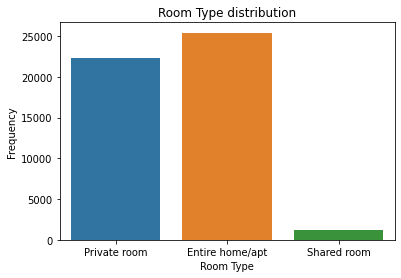

In [16]:
ax = sns.countplot(x="room_type", data=nyc_df)
plt.title('Room Type distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()

Entire Home/Apartment Rooms and Private Rooms having majority of the listing than Shared Rooms.

**Room type distribution in the neighborhood groups**

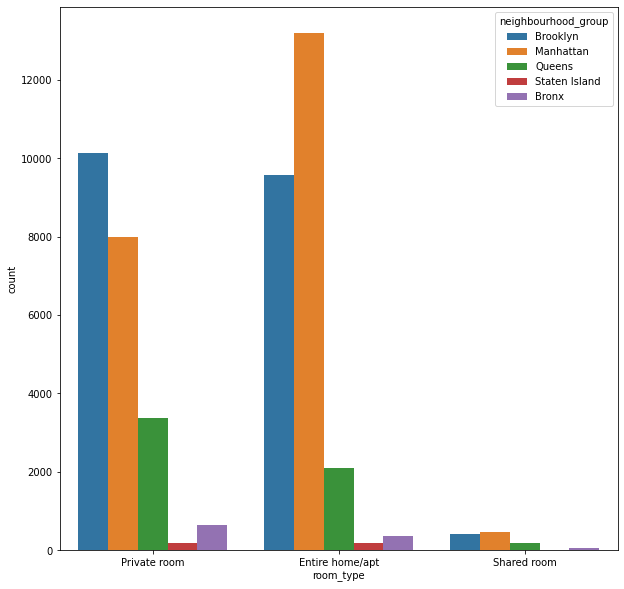

In [17]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="room_type", data=nyc_df,hue="neighbourhood_group")

**Exploring the price**

In [18]:
nyc_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

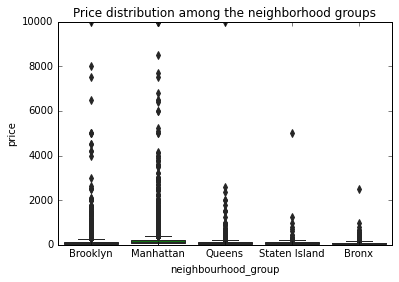

In [90]:
sns.boxplot(x='neighbourhood_group',y='price',data=nyc_df)
plt.title("Price distribution among the neighborhood groups")
plt.show()

From the above plot, 75% of the prices are below "200".The values above $200 are outliers not  because pricing depends on the amenities offered and the locations they are present.

As majority of the data is below the price range of $200, a new data set is created for price distribution for observation.


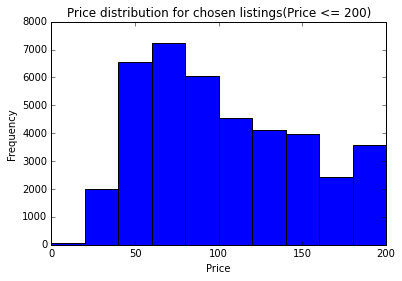

In [91]:
df =nyc_df[nyc_df['price'] <= 200]
df.price.plot(kind='hist')
plt.xlabel("Price")
plt.title("Price distribution for chosen listings(Price <= 200)")
plt.show()


Most of the listings are between the price range of 25$ to 200$

**Price range distribution among the neighborhoods groups**

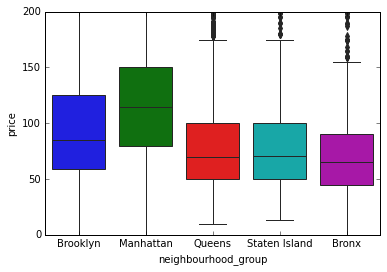

In [92]:
sns.boxplot(x='neighbourhood_group',y='price',data=df)
plt.show()

 Manhattan and Brooklyn are the areas with the highest cost. Manhattan listings have an average price range of 120 dollars, while Brooklyn has 90 dollars. All the other three neighborhoods have almost similar average price range of 70-75 dollars.

**Price range distribution among the room types**

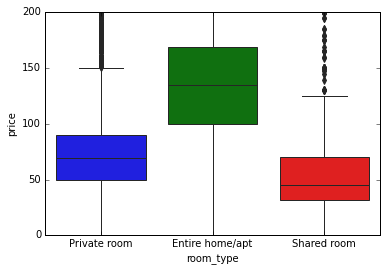

In [137]:
sns.boxplot(x='room_type',y='price',data = df)
plt.show()

Average price for Private rooms - 70$

Average price for Home/Apt rooms -130$

Average price for Shared rooms - 40$


**Checking availability of rooms in neighbourhood groups** 

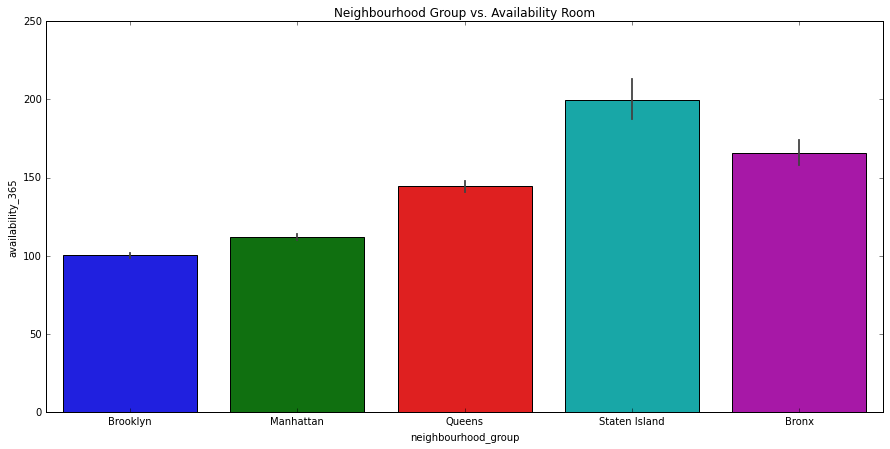

In [99]:
plt.figure(figsize=(15,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.barplot(data=nyc_df, x='neighbourhood_group',y='availability_365')
plt.show()


The availability of rooms is more in Staten island ,Bronx,Queens than Brooklyn and Manhattan.

In [100]:
# host id have the most listings on Airbnb platform 
top_host=nyc_df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

**plot of number_of_reviews vs price**

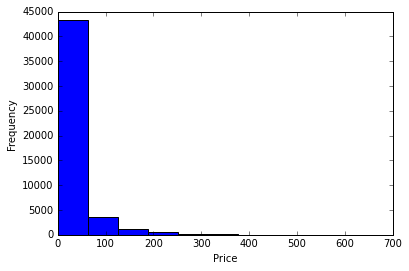

In [136]:
nyc_df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.show()

Maximum number of reviews for price lower than 200 $ 

# Pivot Tables
Price among the neihbourhood_groups

In [116]:
pd.pivot_table(nyc_df, index = 'neighbourhood_group', values = 'price').sort_values('price', ascending = False)


,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


Price among the neihbourhood

In [39]:
pd.pivot_table(nyc_df, index = 'neighbourhood', values = 'price').sort_values('price', ascending = False)

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
...,...
New Dorp,57.000000
Soundview,53.466667
Tremont,51.545455


**Price among the neihbourhood and neihbourhood groups.**

In [40]:
pd.pivot_table(nyc_df, index = ['neighbourhood_group', 'neighbourhood'], values = 'price').sort_values(['neighbourhood_group', 'price'])

price
neighbourhood_group neighbourhood             
Bronx               Hunts Point      50.500000
                    Tremont          51.545455
                    Soundview        53.466667
                    Bronxdale        57.105263
                    Mount Eden       58.500000
...                                        ...
Staten Island       Willowbrook     249.000000
                    Randall Manor   336.000000
                    Prince's Bay    409.500000
                    Woodrow         700.000000
                    Fort Wadsworth  800.000000

[221 rows x 1 columns]

**Price among the room types**

In [61]:
price_room_type = pd.pivot_table(nyc_df, index = 'room_type', values = 'price').sort_values('price', ascending = False)
price_room_type

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


**Host id and Number of reviews**

In [125]:
pd.pivot_table(nyc_df, index = 'host_id', values = 'number_of_reviews').sort_values('number_of_reviews', ascending = False).head(10)

,number_of_reviews
host_id,
47621202,602.500000
4734398,599.333333
2369681,540.000000
12949460,488.000000
792159,480.000000
37312959,454.600000
2321321,454.000000
277379,448.500000
307962,441.000000


latitude and longitude with price

In [135]:
pd.pivot_table(nyc_df, index = ['latitude', 'longitude'], values ='price').sort_values(['latitude', 'longitude'],ascending = False).head(10)

,,price
latitude,longitude,
40.91306,-73.89389,40.0
40.91234,-73.89417,40.0
40.91169,-73.90564,50.0
40.91167,-73.89566,40.0
40.90804,-73.90005,53.0
40.90734,-73.90137,119.0
40.90527,-73.89707,150.0
40.90484,-73.84489,120.0
40.90406,-73.86286,65.0


**Availability  with price**

In [139]:
pd.pivot_table(nyc_df, index = ['availability_365'], values ='price').sort_values(['price'],ascending =False).head(10)


,price
availability_365,
150,308.447368
251,307.034483
97,293.118644
83,279.622951
270,277.898734
146,269.821429
214,268.363636
364,260.372709
257,255.812500
